## Import Library

**Tugas Besar Kapita Selekta Ilmu Komputasi**

**Metode-Metode Regresi**

Anugrah Arief Yahya Lubis

06111840000077

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Normalization (Min Max Scaler)
from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge

# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generalized Linear Model (GLM) / Tweedie Regressor
from sklearn.linear_model import TweedieRegressor

# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Support Vector Machines (SVM) for Regression
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

## Input X

In [ ]:
x = pd.read_excel('data.xlsx', sheet_name='Sheet1', usecols = "A:J")
x = pd.DataFrame(x)
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,63,95,61,59,83,62,60,64,56,90
1,100,85,71,85,64,94,97,65,98,66
2,81,50,80,100,67,78,62,79,54,73
3,92,86,50,87,52,98,99,75,83,95
4,60,55,70,77,75,77,97,89,91,52
...,...,...,...,...,...,...,...,...,...,...
995,66,63,73,86,69,95,80,72,78,65
996,96,59,98,91,99,94,63,91,59,53
997,87,77,58,54,97,58,76,52,55,54
998,70,59,70,67,84,90,95,78,60,71


## Output Y

In [ ]:
y = pd.read_excel('data.xlsx', sheet_name='Sheet1', usecols = "K")
y = pd.DataFrame(y)
y

,y
0,18178
1,118804
2,51562
3,90026
4,23908
...,...
995,31198
996,92549
997,60795
998,32503


## Normalisasi Input (Min Max Scaler)

In [ ]:
scaler = MinMaxScaler()
columns = x.columns
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = columns
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.26,0.90,0.22,0.18,0.66,0.24,0.20,0.28,0.12,0.80
1,1.00,0.70,0.42,0.70,0.28,0.88,0.94,0.30,0.96,0.32
2,0.62,0.00,0.60,1.00,0.34,0.56,0.24,0.58,0.08,0.46
3,0.84,0.72,0.00,0.74,0.04,0.96,0.98,0.50,0.66,0.90
4,0.20,0.10,0.40,0.54,0.50,0.54,0.94,0.78,0.82,0.04
...,...,...,...,...,...,...,...,...,...,...
995,0.32,0.26,0.46,0.72,0.38,0.90,0.60,0.44,0.56,0.30
996,0.92,0.18,0.96,0.82,0.98,0.88,0.26,0.82,0.18,0.06
997,0.74,0.54,0.16,0.08,0.94,0.16,0.52,0.04,0.10,0.08
998,0.40,0.18,0.40,0.34,0.68,0.80,0.90,0.56,0.20,0.42


## Normalisasi Output (Min Max Scaler)

In [ ]:
scaler = MinMaxScaler()
columns = y.columns
y = scaler.fit_transform(y)
y = pd.DataFrame(y)
y.columns = columns
y

,y
0,0.096452
1,0.991805
2,0.393497
3,0.735743
4,0.147437
...,...
995,0.212302
996,0.758193
997,0.475651
998,0.223914


## Split Data

In [ ]:
x_train = x.loc[0:799]

x_valid = x.loc[800:999]
x_valid.index = range(200)

y_train = y[0:800]

y_valid = y[800:1000]
y_valid.index = range(200)

print(x_train)
print(x_valid)
print(y_train)
print(y_valid)

       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10
0    0.26  0.90  0.22  0.18  0.66  0.24  0.20  0.28  0.12  0.80
1    1.00  0.70  0.42  0.70  0.28  0.88  0.94  0.30  0.96  0.32
2    0.62  0.00  0.60  1.00  0.34  0.56  0.24  0.58  0.08  0.46
3    0.84  0.72  0.00  0.74  0.04  0.96  0.98  0.50  0.66  0.90
4    0.20  0.10  0.40  0.54  0.50  0.54  0.94  0.78  0.82  0.04
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
795  0.92  0.80  0.32  0.18  0.00  0.78  0.26  0.42  0.26  0.62
796  0.26  0.28  0.38  0.12  0.02  0.78  0.20  0.84  0.98  0.10
797  0.58  0.26  0.72  0.52  0.52  0.68  0.98  0.10  0.00  0.94
798  0.88  0.06  0.76  0.08  0.68  0.52  0.24  0.52  0.00  0.38
799  0.96  0.90  0.44  0.06  0.48  0.18  0.70  0.32  0.86  0.48

[800 rows x 10 columns]
       x1    x2    x3    x4    x5    x6    x7    x8    x9   x10
0    0.00  0.92  0.56  0.34  0.90  0.64  0.98  0.50  0.28  0.00
1    0.76  0.50  0.10  0.36  0.00  0.80  0.90  0.44  0.18  0.26
2    0.60  0.60

## Linear Regression

Mean Absolute Percentage Error (MAPE): 0.41
Root Mean Squared Error (RMSE): 0.06
Coefficient of Determination (R2): 0.94
[-0.13762301]
[[ 8.36923371e-01  2.28497212e-02 -5.70740472e-03  7.32186561e-02
  -5.47019458e-02  2.43279575e-02  6.44499586e-02  2.14272434e-03
  -7.57483868e-04  1.72163950e-02]]


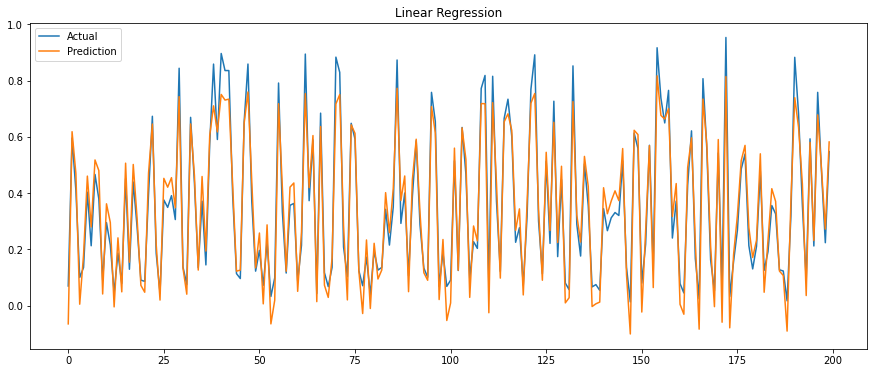

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean Absolute Percentage Error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root Mean Squared Error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of Determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Ridge Regression

Mean Absolute Percentage Error (MAPE): 0.26
Root Mean Squared Error (RMSE): 0.07
Coefficient of Determination (R2): 0.93
[-0.07944399]
[[ 7.29712714e-01  2.44405352e-02  4.41989122e-04  6.16765524e-02
  -4.73230274e-02  2.21220111e-02  5.31873712e-02  8.04484248e-05
   1.72685882e-03  1.98027277e-02]]


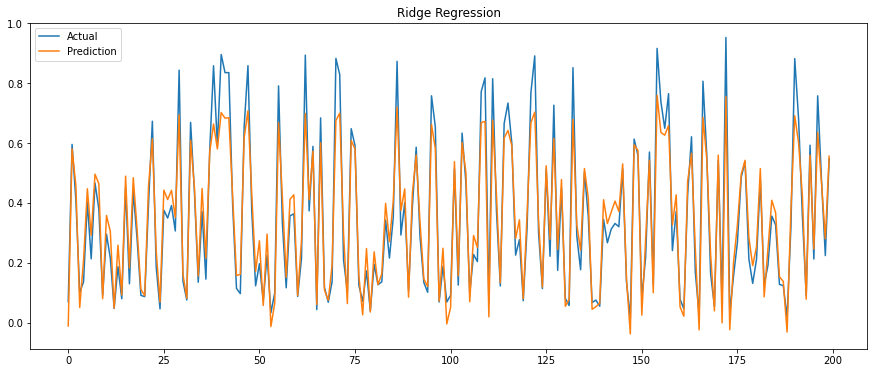

In [ ]:
model = Ridge(alpha=10)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean Absolute Percentage Error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root Mean Squared Error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of Determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Ridge Regression')
plt.legend()
plt.show()

## Lasso Regression

Mean absolute percentage error (MAPE): 0.40
Root mean squared error (RMSE): 0.06
Coefficient of determination (R2): 0.94
[-0.1352348]
[ 0.83567923  0.02186455 -0.00450127  0.07203676 -0.05359941  0.02325778
  0.06333555  0.0011407  -0.          0.01598614]


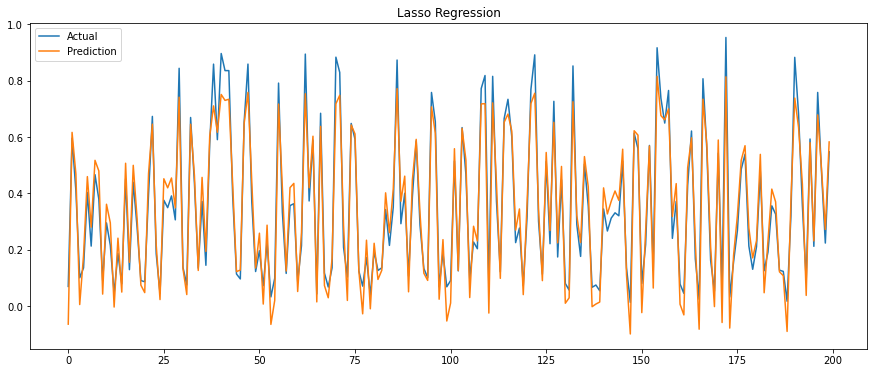

In [ ]:
model = Lasso(alpha=0.0001)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Lasso Regression')
plt.legend()
plt.show()

## Bayesian Ridge Regression

In [ ]:
model = BayesianRidge()
model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Bayesian Ridge Regression')
plt.legend()
plt.show()

NameError: ignored

## Elastic Net Regression

Mean absolute percentage error (MAPE): 0.40
Root mean squared error (RMSE): 0.06
Coefficient of determination (R2): 0.94
Weights of the model:
	0.83580
	0.02237
	-0.00508
	0.07257
	-0.05413
	0.02378
	0.06383
	0.00164
	-0.00017
	0.01662
Intercept of the model: -0.13625



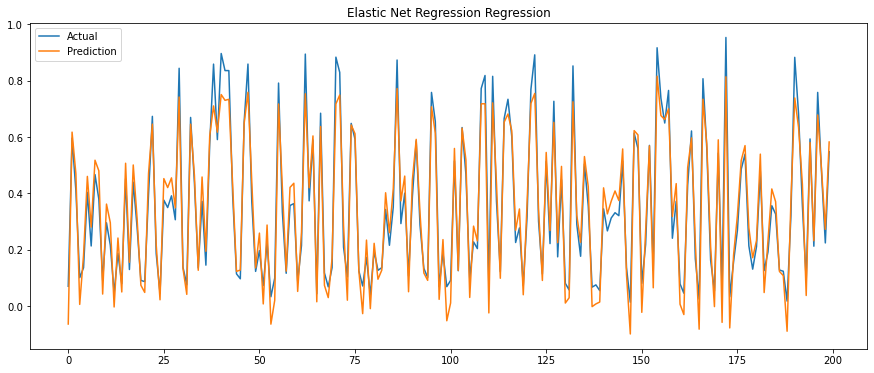

In [ ]:
model =  ElasticNet(alpha=0.0001, l1_ratio=0.5)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))
print('Weights of the model:')
#print(model.coef_)
for i in model.coef_:
    print('\t%.5f' % i)
print('Intercept of the model: %.5f' % model.intercept_)
print()

plt.figure(figsize=(15, 6))
plt.plot(y_valid, label ='Actual')
plt.plot(y_valid_pred, label ='Prediction')
plt.title('Elastic Net Regression Regression')
plt.legend()
plt.show()

## Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.41
Root mean squared error (RMSE): 0.07
Coefficient of determination (R2): 0.94
[-0.11046226]
[ 0.83839083  0.          0.          0.07393555 -0.05486636  0.
  0.06731014  0.          0.          0.        ]


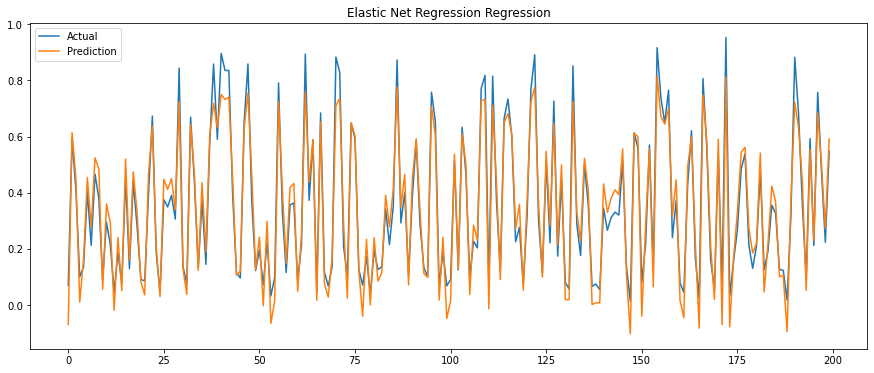

In [ ]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Elastic Net Regression Regression')
plt.legend()
plt.show()

## Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.41
Root mean squared error (RMSE): 0.07
Coefficient of determination (R2): 0.94
[-0.11046226]
[ 0.83839083  0.          0.          0.07393555 -0.05486636  0.
  0.06731014  0.          0.          0.        ]


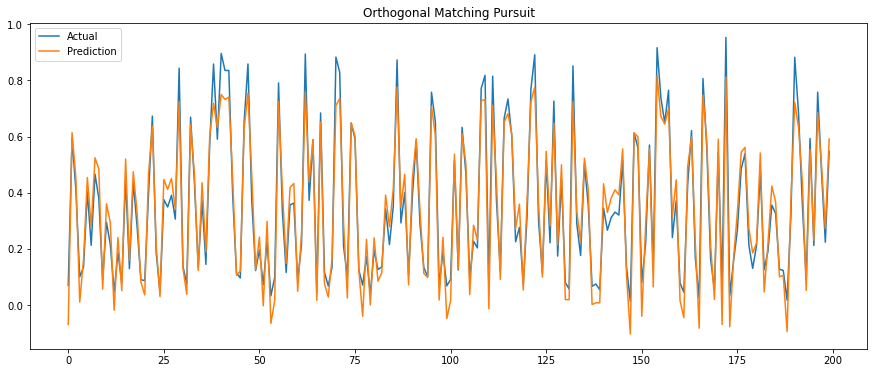

In [ ]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Orthogonal Matching Pursuit')
plt.legend()
plt.show()

## Generalized Linear Model (GLM) / Tweedie Regressor

Mean absolute percentage error (MAPE): 0.18
Root mean squared error (RMSE): 0.03
Coefficient of determination (R2): 0.98
-2.8204776392422226
[ 2.58534348  0.06041049  0.01614613  0.17269912 -0.09421521  0.0715601
  0.18311949  0.00504692  0.01152904 -0.00953919]


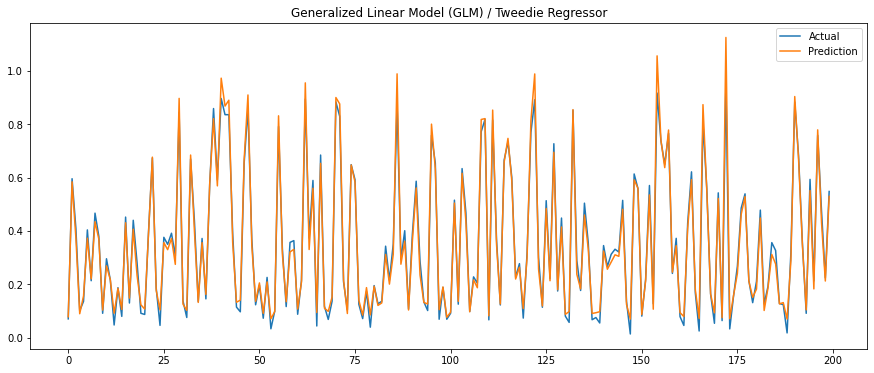

In [ ]:
model = TweedieRegressor(power=1, alpha=0.0001)
model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Generalized Linear Model (GLM) / Tweedie Regressor')
plt.legend()
plt.show()

## Stochastic Gradient Descent

Mean absolute percentage error (MAPE): 0.47
Root mean squared error (RMSE): 0.11
Coefficient of determination (R2): 0.84
[0.03365837]
[ 0.55635817  0.02703455  0.00998867  0.03800808 -0.03713277  0.01577225
  0.03062429 -0.00863349  0.00347733  0.02487307]


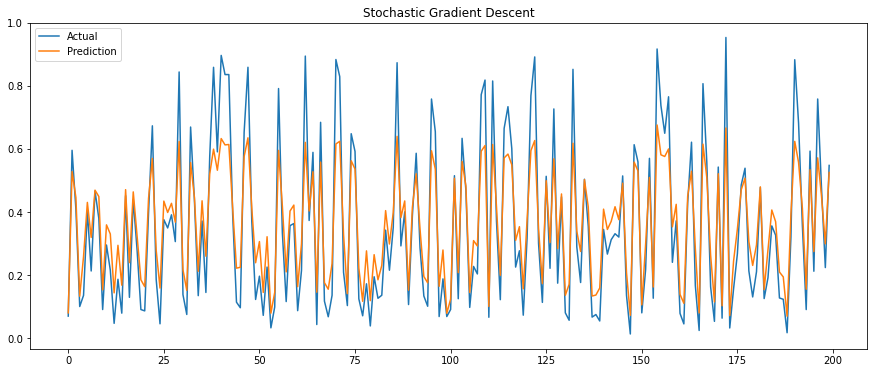

In [ ]:
model = SGDRegressor()
model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Stochastic Gradient Descent')
plt.legend()
plt.show()

## Polynomial Regression

### Dengan Pipeline

Mean absolute percentage error (MAPE): 0.06
Root mean squared error (RMSE): 0.01
Coefficient of determination (R2): 1.00


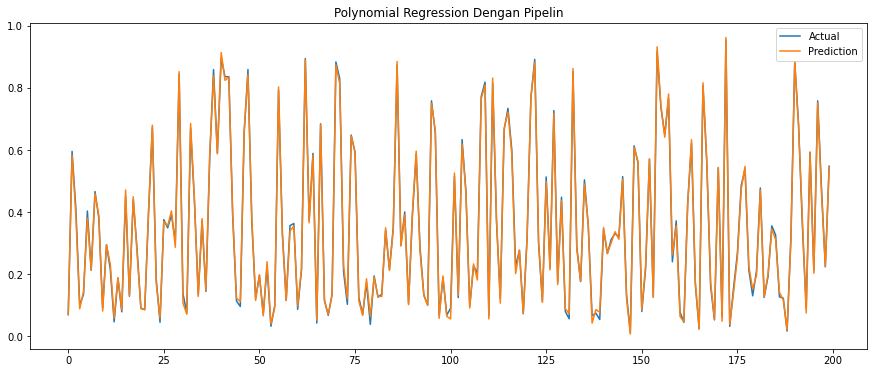

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Polynomial Regression Dengan Pipelin')
plt.legend()
plt.show()

### Tanpa Pipeline (Manual)

Mean absolute percentage error (MAPE): 0.07
Root mean squared error (RMSE): 0.01
Coefficient of determination (R2): 1.00


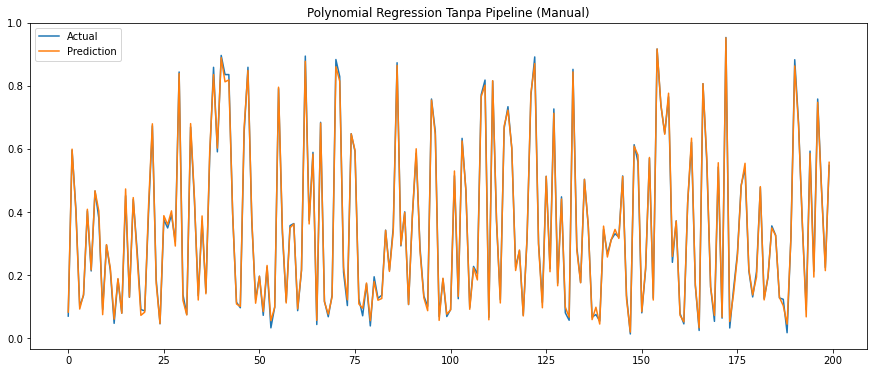

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_valid_poly = poly.transform(x_valid)

x_train_poly = pd.DataFrame(x_train_poly)
x_valid_poly = pd.DataFrame(x_valid_poly)

x_train_poly.columns = poly.get_feature_names(x_train.columns)
x_valid_poly.columns = poly.get_feature_names(x_train.columns)

#print(x_train)
#print(x_train_poly)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_valid_pred = model.predict(x_valid_poly)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Polynomial Regression Tanpa Pipeline (Manual)')
plt.legend()
plt.show()

## Support Vector Machines (SVM) for Regression

Mean absolute percentage error (MAPE): 0.30
Root mean squared error (RMSE): 0.05
Coefficient of determination (R2): 0.96


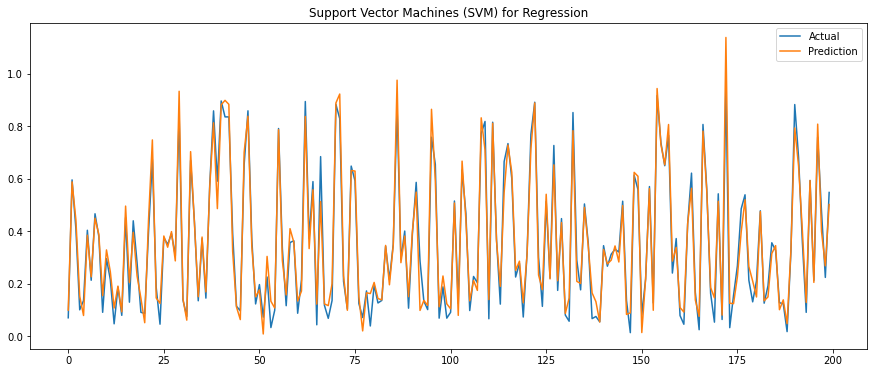

In [ ]:
model = SVR(kernel='poly')
model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Support Vector Machines (SVM) for Regression')
plt.legend()
plt.show()

## Nearest Neighbors

Mean absolute percentage error (MAPE): 0.44
Root mean squared error (RMSE): 0.12
Coefficient of determination (R2): 0.80


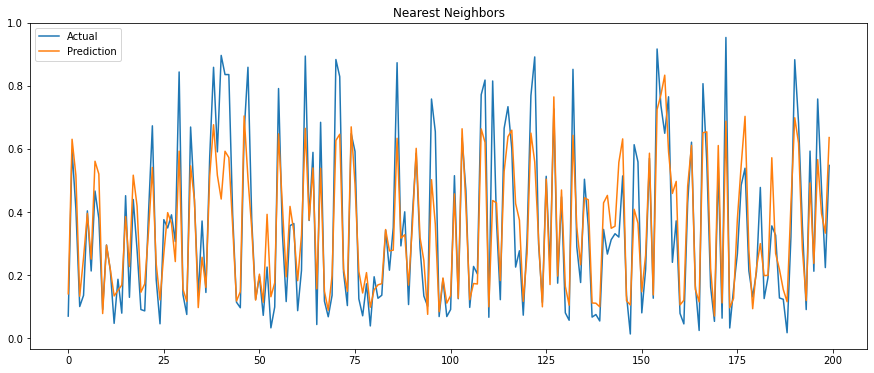

In [ ]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Nearest Neighbors')
plt.legend()
plt.show()

## Decision Tree Regression

Mean absolute percentage error (MAPE): 0.13
Root mean squared error (RMSE): 0.04
Coefficient of determination (R2): 0.98


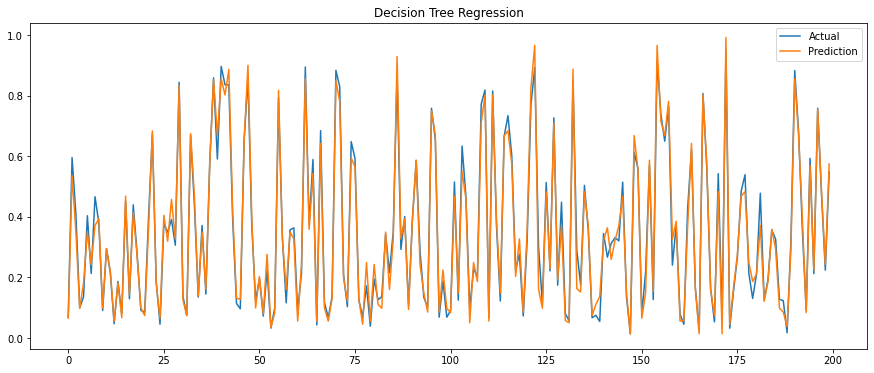

In [ ]:
model = DecisionTreeRegressor(max_depth=9)
model.fit(x_train, y_train)

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

## Multi-layer Perceptron

Mean absolute percentage error (MAPE): 0.32
Root mean squared error (RMSE): 0.09
Coefficient of determination (R2): 0.87


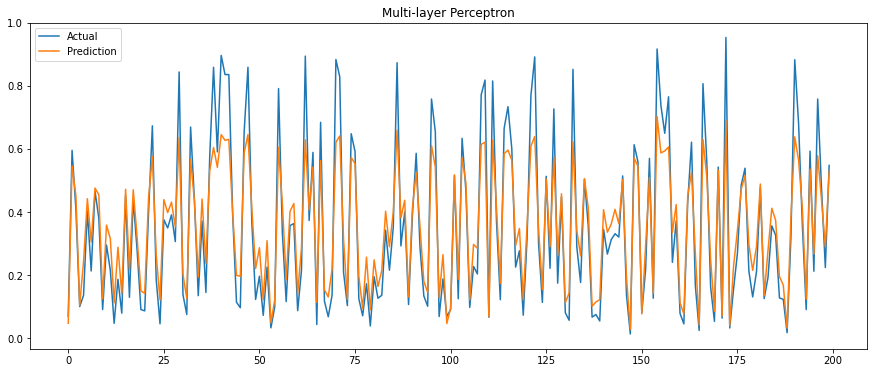

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', solver='adam', max_iter=10000)
model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.title('Multi-layer Perceptron')
plt.legend()
plt.show()